False
False


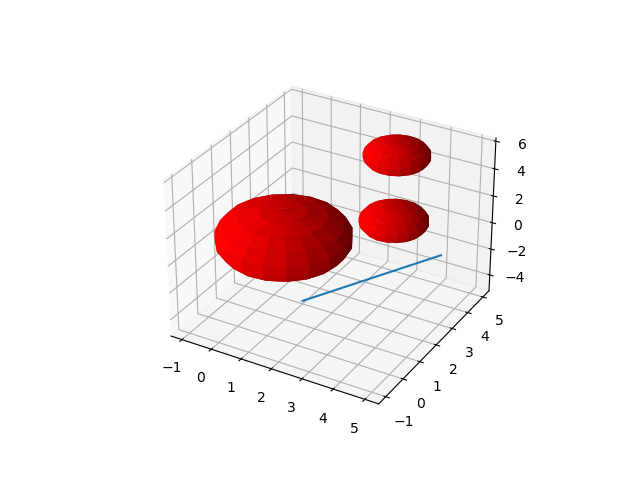

In [7]:
"""
Created on Mon Nov 28 21:26:12 2022

@author: Gebra
"""
# imports
%matplotlib widget

import math
import random

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# line class with some metrics to ease graph creation
class Line():
    # initialize some metrics
    def __init__(self, p0, p1):
        self.p0 = np.array(p0)
        self.p1 = np.array(p1)
        self.direction = np.array(p1) - np.array(p0)
        self.distance = np.linalg.norm(self.direction)
        self.direction = self.direction/self.distance # normalize

    def path(self, t):
        return self.p0 + t * self.dirn

# graph class
class Graph:
    # initialize some metrix
    def __init__(self, startposition, endposition):
        self.startposition = startposition
        self.endposition = endposition
        # size of searchbox
        self.searchboxsize_x = (startposition[0] - endposition[0])
        self.searchboxsize_y = (startposition[1] - endposition[1])
        self.searchboxsize_z = (startposition[2] - endposition[2])
        # location of seachbox startpoint: two times size of box between start and end position
        self.searchbegin_x = self.startposition[0] - (self.searchboxsize_x/2) 
        self.searchbegin_y = self.startposition[1] - (self.searchboxsize_y/2) 
        self.searchbegin_z = self.startposition[2] - (self.searchboxsize_z/2) 
        
        self.vertices = [startposition]
        self.edges = [] # contains the indices of the vertices
        self.indices = {startposition:0} # dictonary with indices for the vertices
        self.distances = {0:0.} # dictonary with distances for each index
    # creating a random position within search frame
    def randpos(self):
        # create random values between 0 and 1
        x = random()
        y = random()
        z = random()
        # convert to value within searchbox
        posx = self.searchbegin_x + x*self.searchboxsize_x*2
        posy = self.searchbegin_y + y*self.searchboxsize_y*2
        posz = self.searchbegin_z + z*self.searchboxsize_z*2
        
# calculate intersection between line and obstacle
# still needs some work, only works for spheres
def intersection(obstacle, line):
    r = obstacle[3]
    C = obstacle[:3]
    P = line.p0
    U = line.direction
    Q=P-C
    a = np.dot(U,U)
    b= 2*np.dot(U,Q)
    c = np.dot(Q,Q)-r*r
    d = np.dot(b,b)-4*np.dot(a,c)
    if (line.p0[0] > (obstacle[0]+r) and line.p1[0] > (obstacle[0]+r)) or (line.p0[0] < (obstacle[0]-r) and line.p1[0] < (obstacle[0]-r)) or (line.p0[1] > (obstacle[1]+r) and line.p1[1] > (obstacle[1]+r)) or (line.p0[1] < (obstacle[1]-r) and line.p1[1] < (obstacle[1]-r)) or (line.p0[2] > (obstacle[2]+r) and line.p1[2] > (obstacle[2]+r)) or (line.p0[2] < (obstacle[2]-r) and line.p1[2] < (obstacle[2]-r)):
        return False
    if d < 0:
        return False
    return True

# determine distance between 2 points
def distance(x, y):
    return np.linalg.norm(np.array(x) - np.array(y))

# determine whether a vertex (point) is in one of the obstacles
def in_obstacle(obstacles, vertex):
    for obstacle in obstacles:
        if distance(obstacle[:3],vertex) < obstacle[3]:
            return True
    return False

# determine whether a edge (line) goes through one of the obstacles
def trough_obstacle(obstacles,line):
    for obstacle in obstacles:
        if intersection(obstacle, line):
            return True
    return False



# some plotting and debugging, still work in progress

fig = plt.figure()
ax = plt.axes(projection ='3d')
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
obstacles = [(1.,1.,1.,2.),(3.,4.,5.,1.),(4,2,3,1)]
lines = [(0.,0.,0.),(1.,1.,1.),(5.,5.,5.),(3.,3.,3.)]

# defining coordinates for the 2 points.
x = np.array([1, 5])
y = np.array([2, 3])
z = np.array([-5, 0])
l = Line((1,2,-5),(5,3,0))
print(trough_obstacle(obstacles,l))
print(in_obstacle(obstacles,(3,3,3)))

# plotting
ax.plot3D(x, y, z)
for obstacle in range(len(obstacles)):
    x = obstacles[obstacle][0]+obstacles[obstacle][3]*np.cos(u)*np.sin(v)
    y = obstacles[obstacle][1]+obstacles[obstacle][3]*np.sin(u)*np.sin(v)
    z = obstacles[obstacle][2]+obstacles[obstacle][3]*np.cos(v)
    ax.plot_surface(x, y, z, color="r")


plt.show()